# **POKEDEX**

![alt text](https://img.rankedboost.com/wp-content/uploads/2017/09/Pokemon-GO-GEN-4-Pokedex.png)


**We will start by looking at the demo of my Project**



In [1]:
from IPython.display import HTML
HTML(f"""<video src={"https://drive.google.com/uc?id=10vGX_F0LYRMbNNpGb_0KRcCE7cyFsn6J"} width=500 controls/>""")

### So as shown in the video the aim of my project is to train a model such that it is able to idetify the type of pokemon provided to it from the test data.We could also provide some URL of the image to test the same.
## **So we start by uploading the kaggle.json file here**

In [2]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


setting up the required environment variables,importing the necessary libraries and ignoring the unnecessary warnings that need to be dealed with


In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
import os
import pandas as pd
warnings.filterwarnings("ignore")

Reading the **kaggle.json** file so that we could extract the API key for downoading and uploading of data


In [4]:
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [5]:
!kaggle datasets download -d mridul18/pokedex  #downloading the dataset from kaggle through my profile

 96% 494M/513M [00:05<00:00, 119MB/s]
100% 513M/513M [00:05<00:00, 90.7MB/s]


In [6]:
!unzip "*.zip" #unzipping the data for further training

Streaming output truncated to the last 5000 lines.
  inflating: test_data/img (2063).jpg  
  inflating: test_data/img (2064).jpg  
  inflating: test_data/img (2066).jpg  
  inflating: test_data/img (2067).jpg  
  inflating: test_data/img (2068).jpg  
  inflating: test_data/img (2069).jpg  
  inflating: test_data/img (207).jpg  
  inflating: test_data/img (2070).jpg  
  inflating: test_data/img (2071).jpg  
  inflating: test_data/img (2072).jpg  
  inflating: test_data/img (2073).jpg  
  inflating: test_data/img (2075).jpg  
  inflating: test_data/img (2076).jpg  
  inflating: test_data/img (2077).jpg  
  inflating: test_data/img (2078).jpg  
  inflating: test_data/img (2079).jpg  
  inflating: test_data/img (208).jpg  
  inflating: test_data/img (2080).jpg  
  inflating: test_data/img (2081).jpg  
  inflating: test_data/img (2083).jpg  
  inflating: test_data/img (2084).jpg  
  inflating: test_data/img (2085).jpg  
  inflating: test_data/img (2086).jpg  
  inflating: test_data/img (208

In [7]:
os.listdir("PokeDex") #looking at the directories inside the data

['Zubat',
 'Hitmonchan',
 'Vaporeon',
 'Exeggcute',
 'Golem',
 'Mew',
 'Clefairy',
 'Pinsir',
 'Lapras',
 'Geodude',
 'Tauros',
 'Jolteon',
 'Krabby',
 'Ivysaur',
 'Arbok',
 'Raichu',
 'Abra',
 'Alolan Sandslash',
 'Machamp',
 'Tentacruel',
 'Meowth',
 'Alakazam',
 'Bellsprout',
 'Wigglytuff',
 'Voltorb',
 'Nidoking',
 'Goldeen',
 'Gastly',
 'Parasect',
 'Moltres',
 'Tangela',
 'Nidorina',
 'Kabutops',
 'Electrode',
 'Ninetales',
 'Poliwag',
 'Omastar',
 'Slowpoke',
 'Rhydon',
 'Rattata',
 'Lickitung',
 'Magmar',
 'Magnemite',
 'Zapdos',
 'Growlithe',
 'Electabuzz',
 'Dodrio',
 'Weezing',
 'Cubone',
 'Golduck',
 'Scyther',
 'Muk',
 'Jigglypuff',
 'Vileplume',
 'Flareon',
 'Chansey',
 'Fearow',
 'MrMime',
 'Sandslash',
 'Haunter',
 'Ekans',
 'Sandshrew',
 'Butterfree',
 'Seaking',
 'Drowzee',
 'Vulpix',
 'Charizard',
 'Spearow',
 'Magneton',
 'Aerodactyl',
 'Eevee',
 'Jynx',
 'Venomoth',
 'Gengar',
 'Rapidash',
 'Rhyhorn',
 'Weedle',
 'Raticate',
 'Omanyte',
 'Shellder',
 'Gloom',
 'Dra

making a data varibale which would store our ImageDataBunch method.
get_transforms method is basically used for data augmentation this would help to train our model in a more better way

In [8]:
path=""
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("PokeDex"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())

Looking at some of the images from the dataset

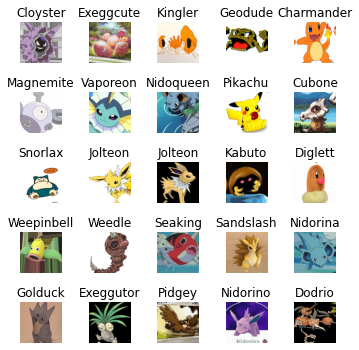

In [9]:
data.show_batch(rows=5, figsize=(5,5))

### Making a learn variable that would store our model#add some more info here about metrics and models


---
**ResNet-50** is a convolutional neural network that is 50 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 224-by-224.


---
**Metrics **for training fastai models are simply functions that take input and target tensors, and return some metric of interest for training. You can write your own metrics by defining a function of that type, and passing it to Learner in the metrics parameter, or use one of the following pre-defined functions.


---
In deep learning, a **convolutional neural network** is a class of deep neural networks, most commonly applied to analyzing visual imagery. They are also known as shift invariant or space invariant artificial neural networks, based on their shared-weights architecture and translation invariance characteristics. 









In [10]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


fit_one_cycle is a method for training the model.Number of epochs used are 6 which can be changed depending the accuracy and time consumption.

In [11]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,3.890064,1.335496,0.676078,01:32
1,1.672004,0.684734,0.823529,01:32
2,0.783686,0.521950,0.867451,01:32
3,0.408096,0.426074,0.894118,01:32
4,0.233929,0.374421,0.904314,01:32
5,0.162935,0.365936,0.904314,01:32




---



### Mouting the project with google drive so that results can be stored inside .pkl and .pth files such that we don't have to access learn variable again and again

In [12]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [13]:
os.makedirs("/content/drive/My Drive/dl_projects/PokeDex",exist_ok=True)#making new directories in google drive

In [14]:
my_dir="/content/drive/My Drive/dl_projects/PokeDex"

Creating a **Stage-1.pkl** file.pkl stands for a “pickle 18” file which is a way of serializing objects in Python. Its contents can be almost anything; it just depends on what was serialized.

In [15]:
learn.save(my_dir+"/Stage-1")#saving 

In [16]:
learn.load("/content/drive/My Drive/dl_projects/PokeDex/Stage-1")#loading the pkl file

Learner(data=ImageDataBunch;

Train: LabelList (5100 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Zubat,Zubat,Zubat,Zubat,Zubat
Path: PokeDex;

Valid: LabelList (1275 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Alakazam,Bulbasaur,Jolteon,Pidgeot,MrMime
Path: PokeDex;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

finally exporting our export.pkl file which would be accessed in next file of the project.The pth file is your model’s weights.

In [17]:
learn.export(my_dir+"/export.pkl")

Now head on to PokeDex(3) for further predictions of the model